In [5]:
from keras.datasets import mnist



In [6]:
(train_data,train_target),(test_data,test_target)=mnist.load_data()

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


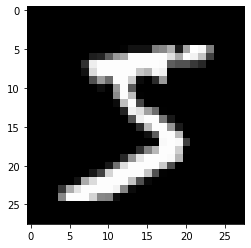

In [7]:
from matplotlib import pyplot as plt
plt.imshow(train_data[0],cmap='gray')
plt.show()

In [9]:
train_target[0]

5

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [11]:
from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
new_train_data=train_data/255
new_test_data=test_data/255


In [13]:
model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2080 - accuracy: 0.9376
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0953 - accuracy: 0.9711
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0675 - accuracy: 0.9799
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0423 - accuracy: 0.9871
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0381 - accuracy: 0.9884
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0304 - accuracy: 0.9911
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0251 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

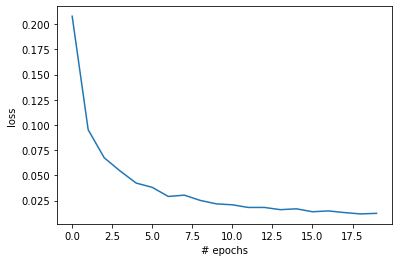

In [14]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

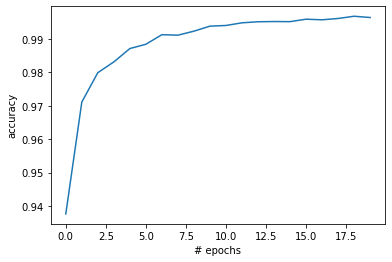

In [15]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [16]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.1217 - accuracy: 0.9831


[0.12170563638210297, 0.9830999970436096]

In [17]:
model.save_weights('FFNN-MNIST.h5')

mo